# Task 1 : Data Science and Business Analytics
## Author : Vasu Sharma


## Step 1 : Importing the Libraries

In [19]:
# Importing all the required libraries 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

## Step 2 : Reading The Data

In [20]:
# Reading data from link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Dataset Information

In [21]:
df.shape

(25, 2)

In [22]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [23]:
df.info() #To know what kind of data is in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


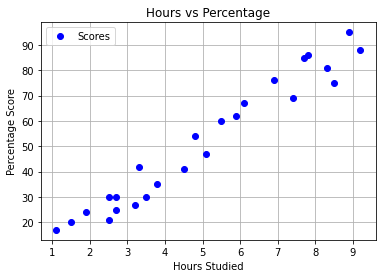

In [24]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o',color = 'blue')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

## From the abobe graph we can see that there is a strong relation between these two variables and that's the reason we're going to use simple linear regression.

##  Step 3 : Finding the Correlation

In [25]:
dfcorr = df.corr() # To determine the correlation btw these variables
dfcorr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

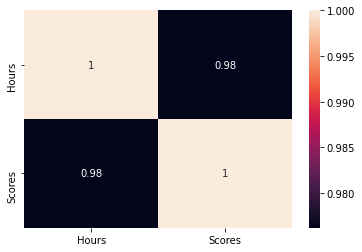

In [26]:
sns.heatmap(dfcorr , annot = True)

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

# Step 4 : Splitting The Data set into two parts (80:20)

In [27]:
X = df.iloc[:, :-1].values  #dividing the data into "attributes" (inputs) and "labels" (outputs)
y = df.iloc[:, 1].values  

In [28]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                            test_size=0.2, random_state=0)  

# Step 5 :Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [29]:
from sklearn.linear_model import LinearRegression  
LinReg = LinearRegression()  
LinReg.fit(X_train, y_train) 

print("Training complete.")

Training complete.


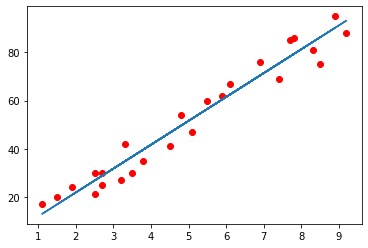

In [30]:
# Plotting the regression line
line = LinReg.coef_*X+LinReg.intercept_

# Plotting for the test data
plt.scatter(X, y, c = 'red')
plt.plot(X, line);
plt.show()

# Step 6 : Making Predictions 
Now that we have trained our algorithm, it's time to make some predictions.

In [31]:
print(X_test) # Testing data - In Hours

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [32]:
y_pred = LinReg.predict(X_test) # Predicting the scores
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [33]:
# Comparing Actual vs Predicted
comp = pd.DataFrame({'Actual Scores': y_test, 'Predicted Scores': y_pred})  
comp 

,Actual Scores,Predicted Scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Step 7 Completing The Task

In [34]:
hours = [[9.25]]
print("Percentage Expected:" + str(LinReg.predict(hours)[0]))

Percentage Expected:93.69173248737535


# Step 8 : Evaluating the model


In [35]:
from sklearn import metrics  
print('Mean Absolute Error:'+ str(metrics.mean_absolute_error(y_test, y_pred))) 

Mean Absolute Error:4.183859899002975


## Thank You For Reading